# TP 1

## Analisis datos Naven

Autores:
* Ezequiel Bernatene
* Franco N. Bellomo

En este jupyter notebook se analizan las evoluciones temporales de las postulaciones y las vistas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
df_personas = pd.read_csv('datos/personas.csv')
df_personas.head()

,id_postulante,fecha_nacimiento,sexo,edad,titulo
0,NM5M,1970-12-03,FEM,48.0,Secundario
1,5awk,1962-12-04,FEM,56.0,Universitario
2,ZaO5,1978-08-10,FEM,40.0,Terciario/Técnico
3,NdJl,1969-05-09,MASC,49.0,Universitario
4,eo2p,1981-02-16,MASC,37.0,Master


In [3]:
df_personas['titulo'].unique()

array(['Secundario', 'Universitario', 'Terciario/Técnico', 'Master', nan,
       'Posgrado', 'Otro', 'Doctorado'], dtype=object)

In [4]:
df_postulaciones = pd.read_csv('datos/postulaciones.csv')
df_postulaciones['fecha'] = pd.to_datetime(df_postulaciones['fecha'])

df_postulaciones = pd.merge(df_postulaciones, df_personas, how='left', on='id_postulante')

df_postulaciones.head()

,id_postulante,id_aviso,fecha,fecha_nacimiento,sexo,edad,titulo
0,NM5M,1112257047,2018-01-15 16:22:34,1970-12-03,FEM,48.0,Secundario
1,NM5M,1111920714,2018-02-06 09:04:50,1970-12-03,FEM,48.0,Secundario
2,NM5M,1112346945,2018-02-22 09:04:47,1970-12-03,FEM,48.0,Secundario
3,NM5M,1112345547,2018-02-22 09:04:59,1970-12-03,FEM,48.0,Secundario
4,5awk,1112237522,2018-01-25 18:55:03,1962-12-04,FEM,56.0,Universitario


In [5]:
df_vistas = pd.read_csv('datos/vistas.csv')
df_vistas['fecha'] = pd.to_datetime(df_vistas['fecha'])
df_vistas.head()

,id_postulante,id_aviso,fecha
0,YjVJQ6Z,1111780242,2018-02-23 18:38:13.187
1,BmVpYoR,1112263876,2018-02-23 18:38:14.296
2,wVkBzZd,1112327963,2018-02-23 18:38:14.329
3,OqmP9pv,1112318643,2018-02-23 18:38:17.921
4,DrpbXDP,1111903673,2018-02-23 18:38:18.973


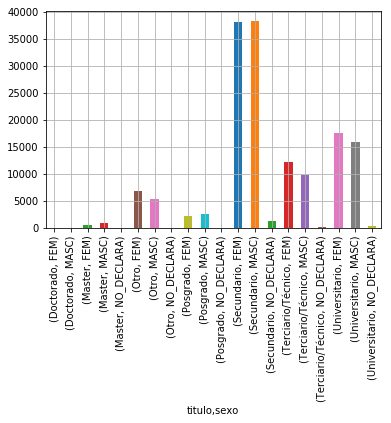

In [6]:
df_personas.groupby(['titulo', 'sexo'])['titulo'].count().plot(kind='bar', grid=True)

# Postulaciones por hora

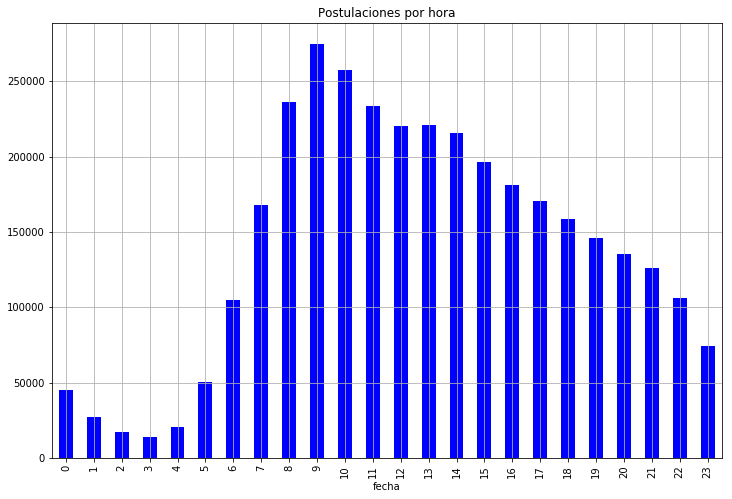

In [7]:
d = df_postulaciones['fecha']
d.groupby(d.dt.hour).count().plot(kind="bar", figsize=(12, 8), title='Postulaciones por hora', 
                                  grid=True, color='blue')

El resultado es esperable. Las horas con menos cantidad de postulaciones (entre las 0 y las 6 de la manana) son las horas en las que la mayoria de la gente esta durmiendo.

A continuacion construimos la misma curva pero discriminando por el maximo titulo obtenido (esto ya fue filtrado en un preprocecsamiento)

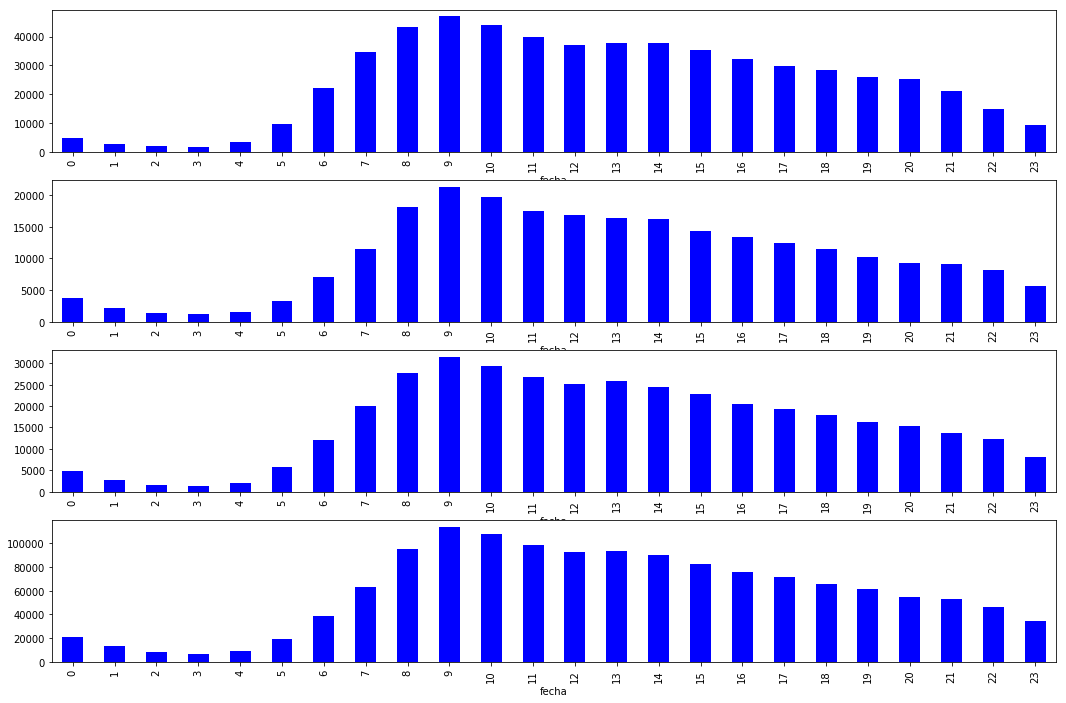

In [8]:
# Actividad por titulo

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 12))

dd = df_postulaciones[df_postulaciones['titulo'] == 'Universitario']['fecha']
dd.groupby(dd.dt.hour).count().plot(ax=axes[0], kind='bar', color='blue')

dd = df_postulaciones[df_postulaciones['titulo'] == 'Otro']['fecha']
dd.groupby(dd.dt.hour).count().plot(ax=axes[1], kind='bar', color='blue')

dd = df_postulaciones[df_postulaciones['titulo'] == 'Terciario/Técnico']['fecha']
dd.groupby(dd.dt.hour).count().plot(ax=axes[2], kind='bar', color='blue')

dd = df_postulaciones[df_postulaciones['titulo'] == 'Secundario']['fecha']
dd.groupby(dd.dt.hour).count().plot(ax=axes[3], kind='bar', color='blue')

No se observan diferencias al haber discriminado por titulo.

## Postulaciones por dia

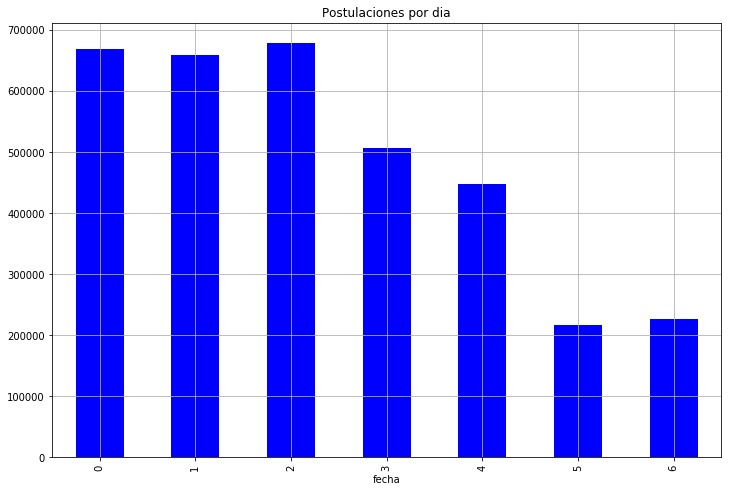

In [9]:
d.groupby(d.dt.dayofweek).count().plot(kind="bar", figsize=(12, 8), title='Postulaciones por dia', 
                                       grid=True, color='blue')

El cero en el **eje x** corresponde al lunes


## Postulaciones por hora y dia

En el **eje x** tenemos las horas del dia, en el **eje y** los dias de las semanas donde el 0 corresponde nuevamente al lunes. El radio del circulo y el color son proporcionales a las cantidades de postulaciones por dia por hora.

In [10]:
df_postulaciones['dia_semana'] = df_postulaciones['fecha'].apply(lambda x: x.dayofweek)
df_postulaciones['hora'] = df_postulaciones['fecha'].apply(lambda x: x.hour)

group = df_postulaciones.groupby(['dia_semana', 'hora'], as_index=False).count()

counts = group['fecha']
area = np.pi * (10 * counts/counts.max())**2

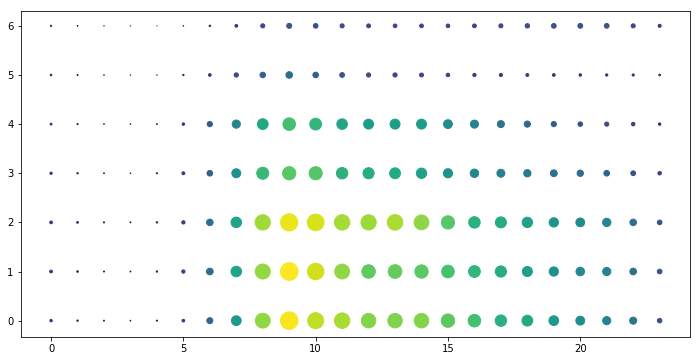

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(group['hora'], group['dia_semana'], s=area, c=counts)
plt.show()

El pico de postulaciones se encuentra de 8 a 15hs de lunes a viernes. Quisas seria bueno pensar publicidad/ofertas especiales para los jueves y viernes.

## Vistas por hora por dia

Realizamos el mismo analisis anterior pero para las vistas

In [12]:
df_vistas['dia_semana'] = df_vistas['fecha'].apply(lambda x: x.dayofweek)
df_vistas['hora'] = df_vistas['fecha'].apply(lambda x: x.hour)

group = df_vistas.groupby(['dia_semana', 'hora'], as_index=False).count()

counts = group['fecha']
area = np.pi * (10 * counts/counts.max())**2

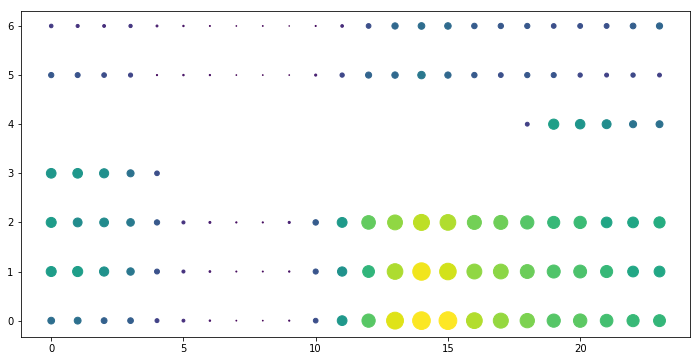

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(group['hora'], group['dia_semana'], s=area, c=counts)
plt.show()

PONER ALGUN CONCLUSION

## Frecuencias de postulaciones

Queremos ver la diferencia en tiempo entre una postulacion y otra para una misma persona y ver si esto nos permite categorizarlos.
Un problema con el que nos encontramos es que existen registros al mismo aviso a la misma hora. Suponemos que son errores de sistema y nos quedamos con las **fecha** unicas.  

Como queremos graficar algunos casos, solo vamos a trabajar con 400 postulantes

In [28]:
diffs = []
xs = []
ys = []

total = len(df_postulaciones['id_postulante'].unique())
actual = 0
    
for id_postulante, group in df_postulaciones.groupby('id_postulante'):
    actual += 1
    print('\rProcesando: {0}/{1}'.format(actual, total), end='')

    if actual == 1000:
        break
    
    # Sort by date
    group = group.sort_values('fecha')
    group = group.drop_duplicates(subset=['fecha'])
    #
    group['dif_tiempo'] = group['fecha'] - group['fecha'].iloc[0]
    group['count'] = [i for i in range(group.shape[0])]

    # Calculate the diff
    x = np.array([t.total_seconds() for t in group['dif_tiempo']])
    x = x/(60)
    y = np.array(group['count'])
    diff = 1/np.diff(x)

    xs.append(x)
    ys.append(y)
    diffs.append(diff)

Procesando: 1000/200888

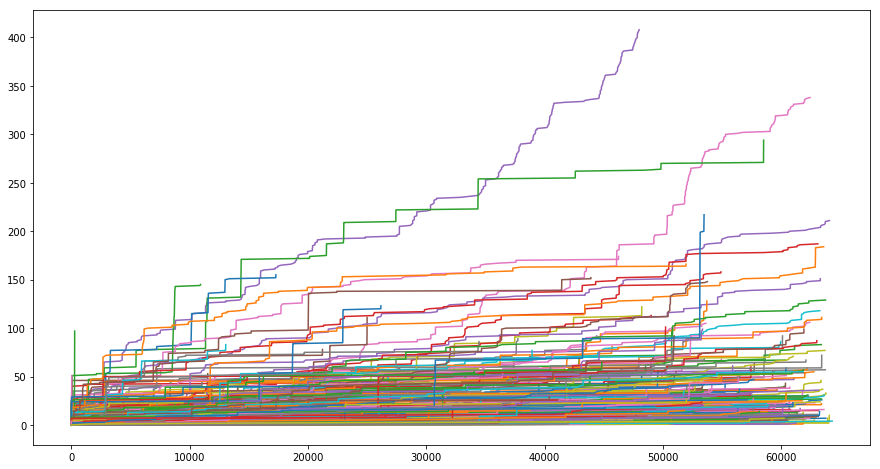

In [29]:
plt.figure(figsize=(15, 8))

for x, y in zip(xs, ys):
    plt.plot(x, y)

plt.show()

En el **eje x** tenemos el tiempo en segundos y en el **eje y** la cantidad de postulaciones acumuladas. Para poder comprar las curvas, medimos el avance temporal tomando como 0 la primera postulacion de cada persona. Algo interesante para analizar es el largo de cada curva. Uno podria suponer que una curva que no llega hasta la fecha final quiere indicar que esa persona encontro trabajo (no podemos diferir si fue por medio del sitio o no).

Se pueden ver algunos comportamientos mas extranos (curva azul, verde y magenta). Son personas que se han postulado mas de 300 veces en dos meses. La persona de la curva azul lo hace de forma **mas constante** mientras que la curva verde es mucho mas esporadica en tiempo. Se podria suponer que la persona de curva azul entra diariamente a la aplicacion miestras que la persona de curva verde lo hace cada algunos dias pero relaizando muchas postulaciones.

Para poder caracterizarlos mejor queremos ver la frecuencia de postulaciones. Calculamos la diferencia en tiempo entre una postulacion y la siguiente por persona para todas sus postulaciones.

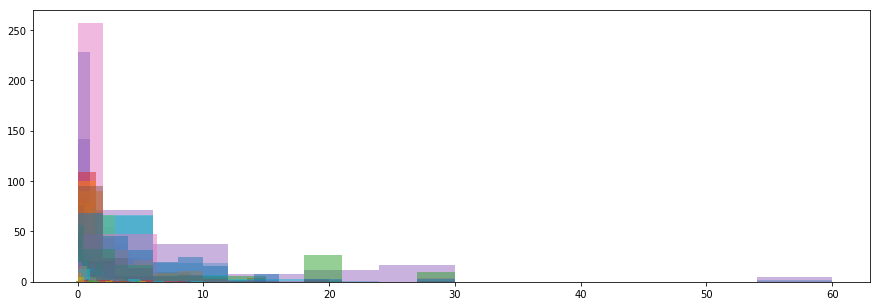

In [30]:
plt.figure(figsize=(15, 5))

for diff in diffs:
    plt.hist(diff, alpha=0.5, rwidth=1)
    
plt.show()

Aca tenemos las postulaciones por minutos. En decir, en el caso extremo tenemos un usuario que realizo unos 60 publicaciones en en un minuto.
Todas las cuentas que realicen mas de 3 postulaciones por minuto deben ser cuentas automatizadas.